In [1]:
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
events = pd.read_csv("data/16-gestures/recordings/marten-12/events.csv")
labels = pd.read_csv("data/16-gestures/recordings/marten-12/labels.csv")

# Convert timestamps to seconds
events["timestamp"] /= 10**6
labels["start"] /= 10**6
labels["end"] /= 10**6

In [3]:
import matplotlib.transforms as mtrans
def plot_labels(labels, ax):
    trans = mtrans.blended_transform_factory(ax.transData, ax.transAxes)
    
    for _, l in labels.iterrows():
        ax.fill_between([l["start"], l["end"]], 0, 1, color="g", alpha=0.25, transform=trans)

In [4]:
def event_density(events, bin_length=0.1):
    ts = events["timestamp"].as_matrix()
    ts_min, ts_max = ts.min(), ts.max()
    length = ts_max - ts_min
    nbins = int(np.ceil(length / bin_length))
    bin_edges = np.linspace(ts_min, ts_min + nbins * bin_length, num=nbins, endpoint=True)
    hist, _ = np.histogram(ts, bins=bin_edges)
    bin_centers = (bin_edges + bin_length / 2)[:-1]
    
    hist = pd.DataFrame(hist)
    hist = hist.rolling(8, center=True).mean()
    
    return bin_centers, hist * (1 / bin_length)

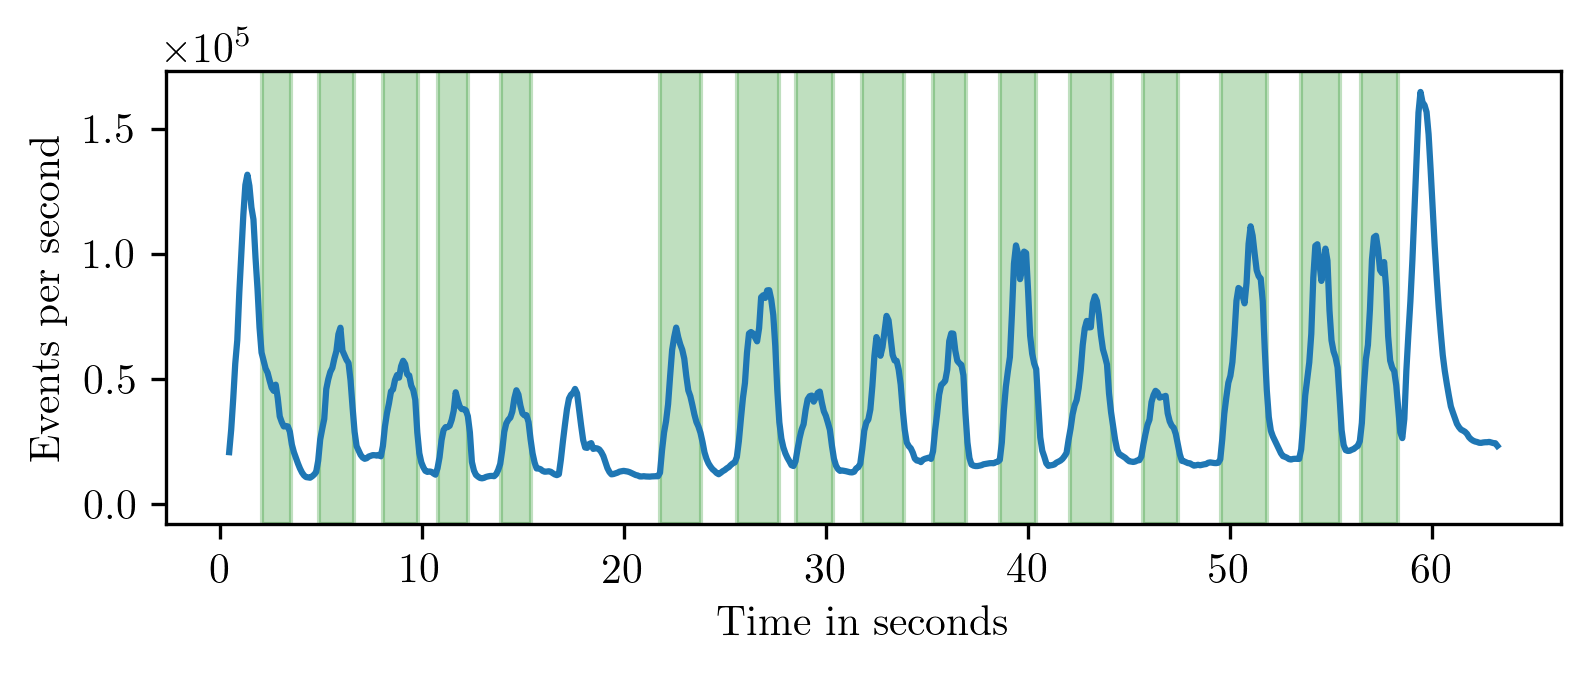

In [5]:
fig, ax = pp.subplots(1, 1, dpi=300, figsize=(6, 2))

X, Y = event_density(events)
ax.plot(X, Y)
plot_labels(labels, ax)

ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
ax.set_ylabel("Events per second")
ax.set_xlabel("Time in seconds")

In [6]:
fig.savefig("../doc/figures/dataset/segmentation.pdf", bbox_inches="tight")